###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

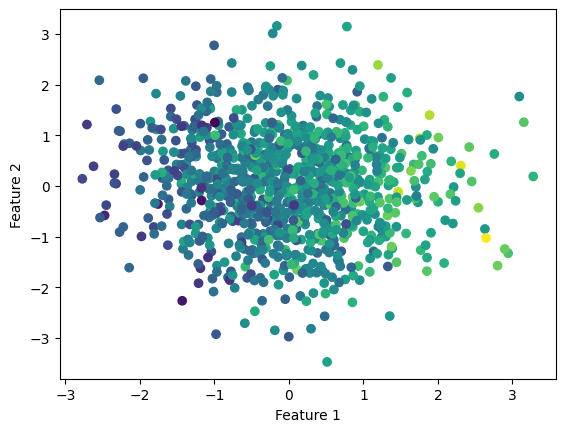

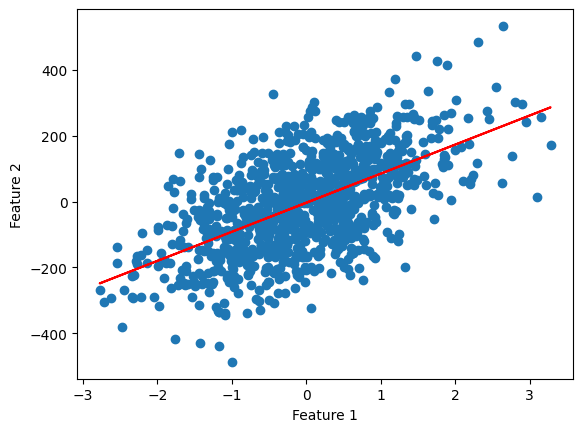

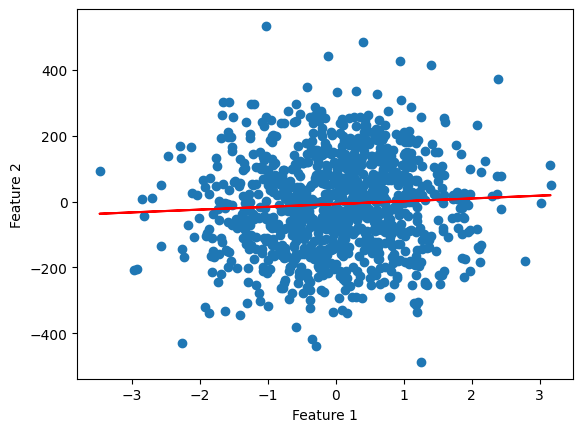

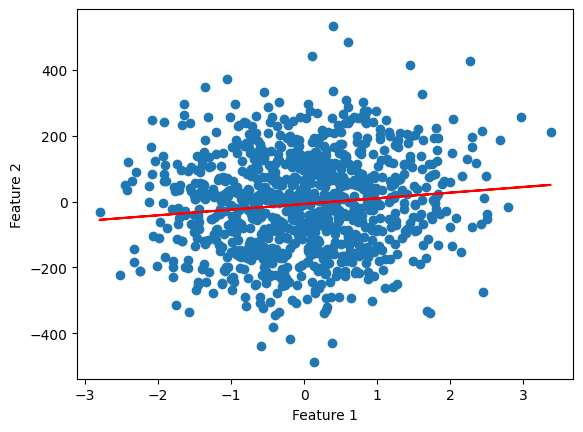

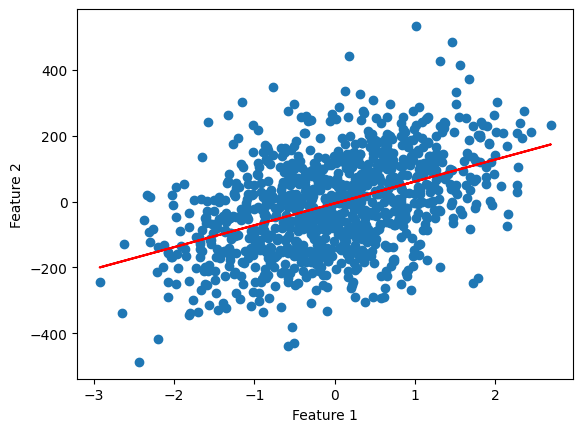

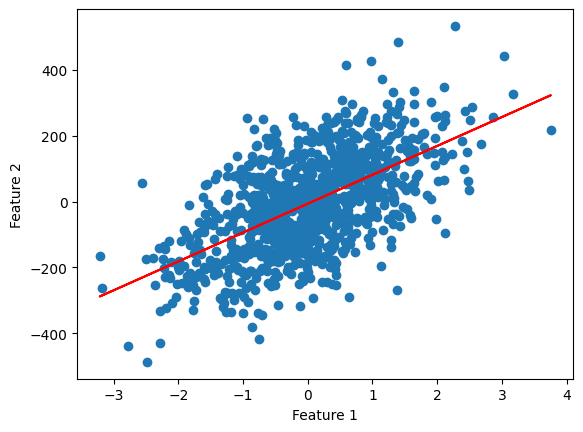

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression as mr
from sklearn import linear_model
X,y = mr(n_samples=1000, n_features=5, n_targets=1)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

dataset1=pd.DataFrame(y,columns=['y'])
dataset2=pd.DataFrame(X)
dataset1.head(1000)
dataset2.head(1000)
frames=[dataset2,dataset1]
database3=pd.concat(frames,axis=1)
for i in range (0,5):
 xs=np.array(database3[i])
 ys=np.array(database3['y'])
 a_b=linear_model.LinearRegression()
 a_b.fit(xs.reshape(-1,1),ys)
 reg_line=a_b.predict(xs.reshape(-1,1))
 plt.plot(xs,reg_line, color='red')
 plt.scatter(xs,ys)
 

 plt.xlabel('Feature 1')
 plt.ylabel('Feature 2')
 plt.show()






### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

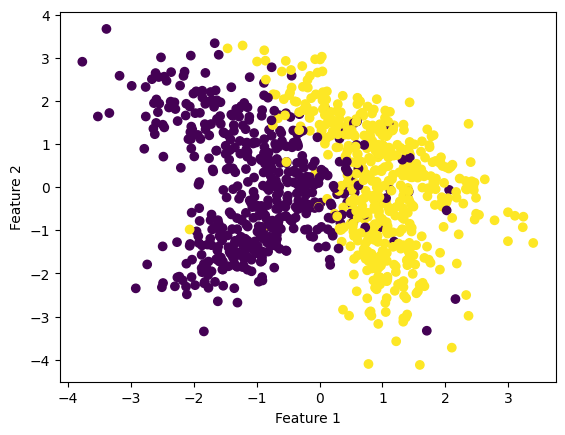

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


X,y= make_classification(n_samples=1000,n_features=2,n_informative=2,n_redundant=0,n_repeated=0,n_classes=2,n_clusters_per_class=2)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

(1000, 2)
(1000,)


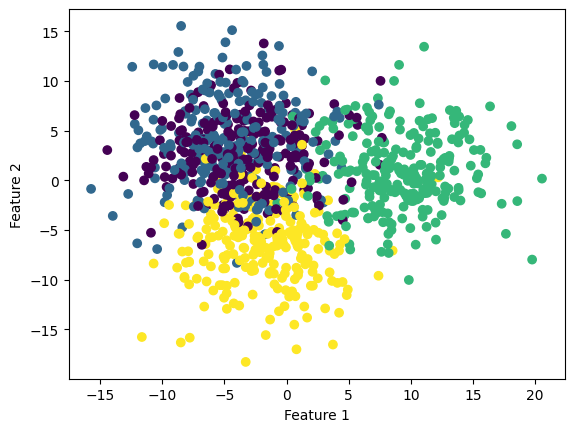

In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples=1000, centers=4, n_features=2,cluster_std=4)
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [4]:
#importing resources

import pandas as pd
from bs4 import BeautifulSoup
import requests

#getting the access of html data

url="https://www.worldometers.info/coronavirus/"

r=requests.get(url)
#print(r)   gives output as <Response [200]> means this url is scarappable

contents=r.content
#print(contents)  gets all the contents of the html page

#parsing of html data

soup=BeautifulSoup(contents,"html.parser")  #instead of using .content if we want to get text inside any thing we can use either .text or .content  Thus, contents can be also r.text
#print(soup.prettify)

#html data acquiring from table
table= soup.find("table" , id="main_table_countries_today")  #this step gets the data from the table in which we are interested
#print(table)  

headers = table.find_all("th")
#print(headers)

titles=[]
for i in headers:
    titles.append(i.text)

#print(titles)


df = pd.DataFrame(columns=titles)  # we made a dataframe in whose headers we set our headers

#print(df)

rows=table.find_all("tr")  # after this step it means that rows become a list automatically containing all the tr tags of the table




for i in rows[1:]:
  rows_td=i.find_all("td")
  n=[]
  for m in rows_td:
     
     n.append(m.text)
     
     
  #print(n)
  l=len(df)
  df.loc[l]=n

print(df)

    #       Country,Other   TotalCases NewCases TotalDeaths NewDeaths   
0       \nNorth America\n  126,492,591            1,632,201            \
1                \nAsia\n  217,251,445  +17,987   1,546,045        +5   
2              \nEurope\n  249,213,505            2,057,551             
3       \nSouth America\n   68,671,557            1,355,254             
4             \nOceania\n   14,309,481               27,779             
..  ..                ...          ...      ...         ...       ...   
242                Total:   68,671,557            1,355,254             
243                Total:   14,309,481               27,779             
244                Total:   12,823,202              258,762             
245                Total:          721                   15             
246                Total:  688,762,502  +17,987   6,877,607        +5   

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ... TotalTests   
0      122,340,422                2,519,968

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

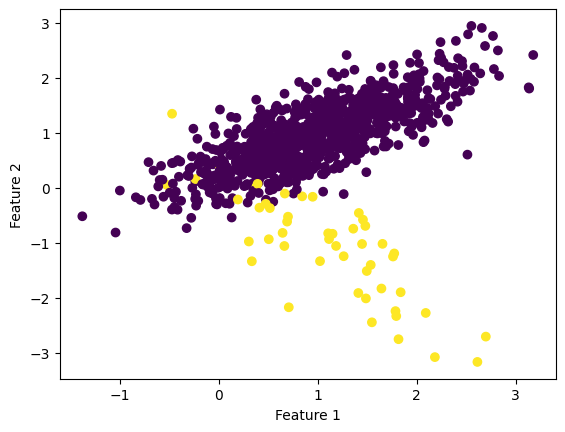

Counter({0: 950, 1: 950})


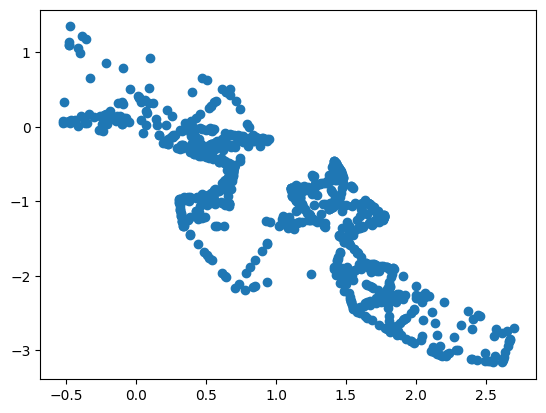

In [16]:
import numpy as np
from numpy import where
from collections import Counter
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=1)
plt.scatter( X[:, 0], X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


counter = Counter(y)
print(counter)


for label, _ in counter.items():
 row_ix = where(y == label)[0]
plt.scatter(X[row_ix, 0], X[row_ix, 1] )

plt.show()





##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
iris = load_iris()

# Assign the feature data to a variable named X and the target data to a variable named y.
X = iris.data
y = iris.target

# Create a pandas DataFrame called df using X as the data and the feature names obtained from the dataset.
df = pd.DataFrame(X, columns=iris.feature_names)

# Display the first 5 rows of the DataFrame df.
print(df.head())

# Check if there are any missing values in the DataFrame and handle them accordingly.
print(df.isnull().sum())

# Split the data into training and testing sets using the train_test_split function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the dimensions of the training set and testing set respectively.
print("Training set dimensions: ", X_train.shape)
print("Testing set dimensions: ", X_test.shape)

# Standardize the feature data in the training set using the StandardScaler from scikit-learn.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the same scaling transformation on the testing set.
X_test = scaler.transform(X_test)

# Print the first 5 rows of the standardized training set.
print(pd.DataFrame(X_train).head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Training set dimensions:  (105, 4)
Testing set dimensions:  (45, 4)
          0         1         2         3
0 -0.413416 -1.462003 -0.099511 -0.323398
1  0.551222 -0.502563  0.717703  0.353032
2  0.671802  0.217016  0.951192  0.758890
3  0.912961 -0.022844  0.309096  0.217746
4  1.636440  1.416315  1.301427  1.705891
